In [1]:
from pylab import*
import numpy as np
N=1000 #
lam=N/2. #Paper S.194 Varianz der v0
gam=1 # Normierte Gravitationskonstante
#c=1./(np.sqrt(2.*np.pi)*lam)
x= np.arange(0,N-1) #Anfangsort, Vec-x bei t=0; Abstand a, der Teilchen =1
v0= np.random.randn(N)# Geschwindigkeitfeld, zufällig
v0/=np.std(v0)  #Normiertes Geschwindigkeitsfeld
v0*=np.sqrt(lam)  #real- Geschwind. der Teilchen
m= np.ones(N)
del_v= np.zeros(N-1)
del_x =np.zeros(N-1)
#print(v0)
#print(v0[1])
#print(x)
#print(m)



def delta_x(x,v0,m,tau=0.01,gam=1):
    """X(i+1)-X(i) -->  Delta X, Betrachte nur Ortsdifferenz, Bei N Teilchen gibt es nur N-1 differenzen,
    und die letzte Differenz, hat keinen nachfolger, also nur bis N-2. """
    
    for i in range(N-2):
        del_x[i]=(x[i+1]-x[i])+ tau*(v0[i+1]-v0[i])+0.5* gam* (tau**2)*(m[i+1]-m[i])
    return del_x

    ##### erzeugt 0 am ende, und das ist uncool :/


def delta_v(v0,m,tau=0.01, gam=1):
    """Geschwind. differenzen, ebenfalls in Abh. von X, daher auch nur N-2. """
    for i in range(len(m)-3):
        del_v[i]= (v0[i+1]-v0[i])+ tau* (-gam* np.cumsum(m[i-1])+ gam* np.cumsum(m[-i]))
    return del_v

#H=[]
#for i in range(N-2):
    #h=all(del_x[i:i+1]<= 0)
    #H.append(h)
#print(H)

In [2]:
q=1
Z=[]#Z soll am Ende alle Längen der Massenvektoren enthalten, also 10000, da 10000 Durchläufe
T=[]
while q <= 10000 :
    
    #Erneuere Anfangsbedingungen für neuen Durchlauf
    x= np.arange(0,N-1) #Anfangsort, Vec-x bei t=0; Abstand a, der Teilchen =1
    v0= np.random.randn(N)# Geschwindigkeitfeld, zufällig
    v0/=np.std(v0)  #Normiertes Geschwindigkeitsfeld
    v0*=np.sqrt(lam)  #real- Geschwind. der Teilchen
    
    #Definiere arrays mit den Anfangsbedingungen
    m= np.ones(N)  #Massenvektor = MV
    del_v= np.zeros(N-1)
    del_x =np.zeros(N-1)
    
    counter=0
    
    for l in range(100): #100*0.01=1 --- 1 Vollzeitschritte   #Forschleife zwar nicht schön aber fürs erste Zweckmäßig
        
        
        
        if len(m) > 2:    #Prüft ob MV nur 2 Element enthält, um Rechenzeit zu sparen. Wenn der z.b. nach 100 durchläufen 
        # nur noch eine einzige Masse da ist, dann soll er nicht noch 200 Berechnungen machen.
            
            
            del_x=delta_x(x,v0,m,tau=0.01*l) #Überschreibt array mit den Ortsdifferenzen der Massen
            H=[]   #Liste, die dann Positioen der Zusammenstöße liefern soll
    
            for i in range(N-2):    
                h=all(del_x[i:i+1]<= 0)   #erzeuge Liste mit Bool für Zsm- Stoß
                H.append(h)             #
                #print("H ist Liste mit Bool:", H)
        
            while True in H:   #Schleife zur Ermittlung welche Positionen Gestoßen sind
                r=H.index(True) #findet den 1. index der True hat
                #print("True befindet sich an Stelle", r)
                m=list(m)    #Wandelt np.array(m) in Liste m um
                del_x=list(del_x)  #Wandelt np.array(del_x) in Liste del_x um
                m[r+1]=m[r]+m[r+1] #Weise dem nächsten Stelle r+1 den Wert von Masse am Pkt r und Pkt r+1 zu, da sie zsm stoßen
                del(H[r])    # löscht Stoßposition in H
                del(m[r])    #löscht Masse am Punkt R
                del(del_x[r])   #löscht Abstand von x[r] zu x[r+1]
        
        
            m=np.array(m)    #wandelt Liste(m) wieder in np.array(m) um
            del_x=np.array(del_x)    #wandelt Liste(del_x) wieder in np.array(del_x) um
            #print("MV", m)
            #print("Länge MV", len(m))    #Prüft Länge

            #print("Ortsdiff-vektor", del_x)    #Prüft array
            #print("Länge Ortsdiff-vektor", len(del_x))

            del_v=delta_v(v0,m,tau=0.01*l)  #updating v0
            del_v= v0

            N=len(m)
            counter=counter +1
            #print("__________________________________________________________________")
        
        else:     #wenn nur noch 1 Element in m ist, soll die Endlänge von m in Z eintragen und abbrechen
            
            T.append(counter)
            break
            
    
    Z.append(N)
    #T.append(counter)
    q=q+1


#Z=np.array(Z)    
print("Liste mit Endlänge der MVen",Z)
print("Liste der Länge von MV:", N)
print("Liste der Zeiten:", T)
print(len(Z))
print(len(T))

Liste mit Endlänge der MVen [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

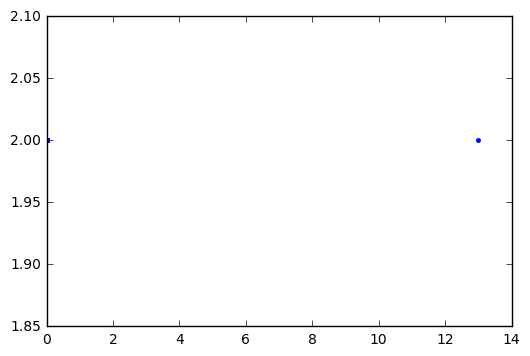

In [3]:
%matplotlib inline
xlabel=("$Zeit$")
ylabel=("$Länge$")
plot(T,Z,'.')
show()